## El presente código muestra la estructura interna de una red neuronal artificial 

## simple de dos capas para predecir los valores de la función 'XOR'

### Se muestra explícitamente el proceso de "Forward propagation" y "Backward propagation"

### para calcular el gradiente de la función de costo.

### Para minimizar la función de costo usamos un optimizador de gradiente descendiente

In [1]:
import numpy as np 

import matplotlib.pyplot as plt 

In [2]:
# funciones de activación y sus derivadas:

# función sigmoide y su derivada:
def f_sigmoide(x, derivate = False):
    if derivate:
        return np.exp(-x)/( (1+np.exp(-x))**2 )
    else:       
        return 1/(1+ np.exp(-x))

# función 'relu' y su derivada:
def f_relu(x, derivate = False):
    if derivate:
        x[x<=0] = 0
        x[x>0] = 1
        return x
    else:
        x[x<=0] = 0
        x[x>0] = x[x>0]
        return x

# función de costo y su derivada:
def Loss(y_aprx , y_obs, derivate = False):
    if derivate:
        N = len(y_obs)
        return (2/N)*(y_aprx - y_obs)
    else:
        # Error cuadrático medio:
        return np.mean( (y_aprx - y_obs)**2 )

In [3]:
# Construimos features:
features = np.array([ [0,0], [0,1], [1,0], [1,1] ])

# Construimos labels (codificados):
cero = [1,0] # <-- "cero"
uno = [0,1] # <-- "uno"
labels = np.array([uno , cero , cero , uno])

print('Features: \n',features )
print('\nLabels: \n',labels )

Features: 
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]

Labels: 
 [[0 1]
 [1 0]
 [1 0]
 [0 1]]


In [4]:
# Seleccionamos conjunto de entrenamiento:
N = 4
x_train = features[0:N , :]
y_train = labels[0:N , :]

In [5]:
# Construimos una misma arquitectura de red para todos los features:

# numero de componentes de cada feature
k = x_train.shape[1]

# numero de neuronas de la primer capa oculta
n = 3

# numero de neuronas de la capa de salida
# es igual al numero de posibles labels a predecir
m = 2 

In [6]:
Ne = 200 # Numero de epochs
Err = np.zeros(Ne)

# Inicializamos matrices de pesos y sesgos para las 2 capas:
W1 = np.random.rand(n,k)
W2 = np.random.rand(m,n)
b1 = np.random.rand(n)
b2 = np.random.rand(m)

# learning rates para pesos y sesgos:
lr_W1 = 0.8
lr_W2 = 0.8
lr_b1 = 0.8
lr_b2 = 0.8


for epochs in range(Ne):
    #print( '\nEpoch: ', epochs)
    Loss_i = 0
    
    # Recorremos cada uno de los datos de entrenamiento:
    for i in range(N):
        # *********************************************************************
        # Forward propagation:
        
        # cargamos el i-esimo feature 'xi' y su respectivo label 'yi':
        xi = x_train[i,:]
        yi = y_train[i,:]

        # Procesamiento de valores en la capa oculta:
        z1 = np.dot(W1,xi) + b1
        f1 = f_relu(z1)

        # Procesamiento de valores en la capa de salida:
        z2 = np.dot(W2,f1) + b2
        f2 = f_sigmoide(z2)# <-- label aproximado (predicción de la red)

        # Evaluación de la función de costo:
        Loss_i = (1/N)*Loss(f2,yi) + Loss_i                

        # *********************************************************************
        # Backward propagation:
        
        # -----------------------------------------------------
        Df2_Loss = Loss(f2 , yi, derivate = True).reshape(m,1)
        Dz2_f2 = f_sigmoide(z2, derivate = True).reshape(m,1)        

        # Derivada con respecto a 'W2'
        DW2_z2 = f1.reshape(1,n)
        DW2_Loss = np.dot( (Df2_Loss*Dz2_f2) , DW2_z2)

        # Derivada con respecto a 'b2'
        Db2_Loss = (Df2_Loss*Dz2_f2).reshape(b2.shape)

        # -----------------------------------------------------
        Df1_Loss = np.dot( (Df2_Loss.reshape(1,m)*Dz2_f2.reshape(1,m)) , W2 )
        Df1_Loss = Df1_Loss.reshape(n,1)
        Dz1_f1 = f_relu(z1, derivate = True).reshape(n,1)        

        # Derivada con respecto a 'W1'
        DW1_z1 = xi.reshape(1,k)
        DW1_Loss = np.dot( (Df1_Loss*Dz1_f1) , DW1_z1)

        # Derivada con respecto a 'b1'
        Db1_Loss = (Df1_Loss*Dz1_f1).reshape(b1.shape)

        # *********************************************************************
        # actualizamos pesos y sesgos con descenso de gradiente:
        W1 = W1 - lr_W1 * DW1_Loss
        W2 = W2 - lr_W2 * DW2_Loss
        b1 = b1 - lr_b1 * Db1_Loss
        b2 = b2 - lr_b2 * Db2_Loss

    Err[epochs] = Loss_i
    #print( '\nLoss: ', Loss_i)

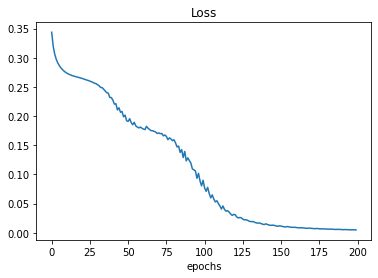

In [7]:
plt.figure
plt.plot(Err)
plt.title('Loss')
plt.xlabel('epochs')
plt.show()

In [8]:
# matrices de pesos y sesgos optimos:
print('Pesos optimos:')
print('\nW1 = \n',W1)
print('\nW2 = \n',W2)

print('\n\nSesgos optimos:')
print('\nb1 = ',b1)
print('\nb2 = ',b2)

Pesos optimos:

W1 = 
 [[ 2.2409599  -2.11500969]
 [ 3.43039688 -3.44430837]
 [ 0.54691613 -0.54889167]]

W2 = 
 [[-2.34599473  3.23893227  0.49378275]
 [ 2.37501619 -3.28630233 -0.45658773]]


Sesgos optimos:

b1 =  [ 2.08806885e+00 -8.42112819e-03 -1.45599246e-03]

b2 =  [ 2.04345093 -2.06623813]


In [9]:
# Predecimos el label de un feature dado:

# Feature:
xi = [0,1]

# Label esperado:
yi = cero

# *********************************************************************
# Hacemos Forward propagation para predecir label:

# Procesamiento de valores en la capa oculta:
z1 = np.dot(W1,xi) + b1
f1 = f_relu(z1)

# Procesamiento de valores en la capa de salida:
z2 = np.dot(W2,f1) + b2
f2 = np.round(f_sigmoide(z2)) # <-- label aproximado (predicción de la red)

print('  Label esperado:', yi)
print('Label aproximado:', f2)

  Label esperado: [1, 0]
Label aproximado: [1. 0.]
